In [1]:
import pandas as pd
import numpy as np
from regression_inference import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=True)
X, y = spector_data.exog, spector_data.endog
X = pd.DataFrame(X)
y =pd.Series(y) 

In [3]:
model = LogisticRegression().fit(X, y)
pd.DataFrame(model.robust_se(apply=True, type="HC0"))
print(model)


Logistic Regression Results
-----------------------------------
Dependent:                    GRADE
-----------------------------------
 
const                    -13.0213**
                           (5.1976)
 
GPA                        2.8261**
                           (1.2675)
 
TUCE                         0.0952
                           (0.1179)
 
PSI                        2.3787**
                           (0.9644)

-----------------------------------
Pseudo R-squared              0.374
LR Statistic                 15.404
Observations                 32.000
Log Likelihood              -12.890
Deviance                     25.779
Null Deviance                41.183
AIC                          33.779
BIC                          39.642
*p<0.1; **p<0.05; ***p<0.01



In [4]:
prediction_set = [
    np.array([[3.5, 20.0, 1.0]]),
    np.array([[2.8, 25.0, 0.0]]),
    np.array([[3.9, 28.0, 1.0]]),
]
predictions = pd.concat([pd.DataFrame(model.predict(test_set, return_table=True)) for test_set in prediction_set], ignore_index=True)
predictions

features  prediction_prob  \
0  {'GPA': '3.50', 'TUCE': '20.00', 'PSI': '1.00'}           0.7599   
1  {'GPA': '2.80', 'TUCE': '25.00', 'PSI': '0.00'}           0.0613   
2  {'GPA': '3.90', 'TUCE': '28.00', 'PSI': '1.00'}           0.9545   

   prediction_class  std_error  z_statistic     P>|z|  ci_low_0.05  \
0                 1     0.7778       1.4810  0.138595       0.4079   
1                 0     0.9965      -2.7389  0.006165       0.0092   
2                 1     1.3352       2.2796  0.022632       0.6051   

   ci_high_0.05  
0        0.9356  
1        0.3151  
2        0.9965

In [5]:
model

LogisticRegression(model_type='logit', feature_names=Index(['const', 'GPA', 'TUCE', 'PSI'], dtype='object'), target='GRADE', alpha=0.05, theta=array([-13.02134686,   2.82611259,   0.09515766,   2.37868766]), coefficients=array([2.82611259, 0.09515766, 2.37868766]), intercept=np.float64(-13.021346858115683), degrees_freedom=28, log_likelihood=np.float64(-12.889634222131416), aic=np.float64(33.77926844426283), bic=np.float64(39.64221205546174), variance_coefficient=array([[ 2.70148941e+01, -5.59337609e+00, -3.36820528e-01,
        -1.48373794e+00],
       [-5.59337609e+00,  1.60667282e+00,  6.10492519e-03,
         1.97324805e-01],
       [-3.36820528e-01,  6.10492519e-03,  1.39056612e-02,
         1.93465916e-02],
       [-1.48373794e+00,  1.97324805e-01,  1.93465916e-02,
         9.30104412e-01]]), std_error_coefficient=array([5.19758541, 1.26754598, 0.11792227, 0.96441921]), ci_low=array([-23.20842707,   0.34176812,  -0.13596574,   0.48846074]), ci_high=array([-2.83426665,  5.31045707

In [6]:
pd.DataFrame(model.inference_table())

feature  coefficient  std_error  z_statistic  P>|t|  ci_low_0.05  \
0   const     -13.0213     5.1976      -2.5053  0.012      -23.208   
1     GPA       2.8261     1.2675       2.2296  0.026        0.342   
2    TUCE       0.0952     0.1179       0.8070  0.420       -0.136   
3     PSI       2.3787     0.9644       2.4664  0.014        0.488   

   ci_high_0.05  
0        -2.834  
1         5.310  
2         0.326  
3         4.269

In [7]:
pd.DataFrame(model.variance_inflation_factor())

feature     VIF
0     GPA  1.1762
1    TUCE  1.1894
2     PSI  1.0129

In [8]:
model.feature_names

Index(['const', 'GPA', 'TUCE', 'PSI'], dtype='object')

In [9]:
prediction_set = [
    np.array([[2.66, 20.0, 0.0]]),
    np.array([[2.89, 22.0, 0.0]]),
    np.array([[3.28, 24.0, 0.0]]),
    np.array([[2.92, 12.0, 0.0]]),
    np.array([[4.00, 21.0, 0.0]]),
    np.array([[2.86, 17.0, 0.0]]),
    np.array([[2.76, 17.0, 0.0]]),
    np.array([[2.87, 21.0, 0.0]]),
    np.array([[3.03, 25.0, 0.0]]),
    np.array([[3.92, 29.0, 0.0]]),
    np.array([[2.63, 20.0, 0.0]]),
    np.array([[3.32, 23.0, 0.0]]),
    np.array([[3.57, 23.0, 0.0]]),
    np.array([[3.26, 25.0, 0.0]]),
    np.array([[3.53, 26.0, 0.0]]),
    np.array([[2.74, 19.0, 0.0]]),
    np.array([[2.75, 25.0, 0.0]]),
    np.array([[2.83, 19.0, 0.0]]),
    np.array([[3.12, 23.0, 1.0]]),
    np.array([[3.16, 25.0, 1.0]]),
    np.array([[2.06, 22.0, 1.0]]),
    np.array([[3.62, 28.0, 1.0]]),
    np.array([[2.89, 14.0, 1.0]]),
    np.array([[3.51, 26.0, 1.0]]),
    np.array([[3.54, 24.0, 1.0]]),
    np.array([[2.83, 27.0, 1.0]]),
    np.array([[3.39, 17.0, 1.0]]),
    np.array([[2.67, 24.0, 1.0]]),
    np.array([[3.65, 21.0, 1.0]]),
    np.array([[4.00, 23.0, 1.0]]),
    np.array([[3.10, 21.0, 1.0]]),
    np.array([[2.39, 19.0, 1.0]]),
]
predictions = pd.concat([pd.DataFrame(model.predict(test_set, return_table=True)) for test_set in prediction_set], ignore_index=True)
predictions

features  prediction_prob  \
0   {'GPA': '2.66', 'TUCE': '20.00', 'PSI': '0.00'}           0.0266   
1   {'GPA': '2.89', 'TUCE': '22.00', 'PSI': '0.00'}           0.0595   
2   {'GPA': '3.28', 'TUCE': '24.00', 'PSI': '0.00'}           0.1873   
3   {'GPA': '2.92', 'TUCE': '12.00', 'PSI': '0.00'}           0.0259   
4   {'GPA': '4.00', 'TUCE': '21.00', 'PSI': '0.00'}           0.5699   
5   {'GPA': '2.86', 'TUCE': '17.00', 'PSI': '0.00'}           0.0349   
6   {'GPA': '2.76', 'TUCE': '17.00', 'PSI': '0.00'}           0.0265   
7   {'GPA': '2.87', 'TUCE': '21.00', 'PSI': '0.00'}           0.0516   
8   {'GPA': '3.03', 'TUCE': '25.00', 'PSI': '0.00'}           0.1111   
9   {'GPA': '3.92', 'TUCE': '29.00', 'PSI': '0.00'}           0.6935   
10  {'GPA': '2.63', 'TUCE': '20.00', 'PSI': '0.00'}           0.0245   
11  {'GPA': '3.32', 'TUCE': '23.00', 'PSI': '0.00'}           0.1900   
12  {'GPA': '3.57', 'TUCE': '23.00', 'PSI': '0.00'}           0.3222   
13  {'GPA': '3.26', 'TUCE': '25.00', 'PSI': '0.00'}           0.1932   
14  {'GPA': '3.53', 'TUCE': '26.00', 'PSI': '0.00'}           0.3610   
15  {'GPA': '2.74', 'TUCE': '19.00', 'PSI': '0.00'}           0.0302   
16  {'GPA': '2.75', 'TUCE': '25.00', 'PSI': '0.00'}           0.0536   
17  {'GPA': '2.83', 'TUCE': '19.00', 'PSI': '0.00'}           0.0386   
18  {'GPA': '3.12', 'TUCE': '23.00', 'PSI': '1.00'}           0.5899   
19  {'GPA': '3.16', 'TUCE': '25.00', 'PSI': '1.00'}           0.6608   
20  {'GPA': '2.06', 'TUCE': '22.00', 'PSI': '1.00'}           0.0614   
21  {'GPA': '3.62', 'TUCE': '28.00', 'PSI': '1.00'}           0.9048   
22  {'GPA': '2.89', 'TUCE': '14.00', 'PSI': '1.00'}           0.2418   
23  {'GPA': '3.51', 'TUCE': '26.00', 'PSI': '1.00'}           0.8521   
24  {'GPA': '3.54', 'TUCE': '24.00', 'PSI': '1.00'}           0.8383   
25  {'GPA': '2.83', 'TUCE': '27.00', 'PSI': '1.00'}           0.4811   
26  {'GPA': '3.39', 'TUCE': '17.00', 'PSI': '1.00'}           0.6354   
27  {'GPA': '2.67', 'TUCE': '24.00', 'PSI': '1.00'}           0.3072   
28  {'GPA': '3.65', 'TUCE': '21.00', 'PSI': '1.00'}           0.8417   
29  {'GPA': '4.00', 'TUCE': '23.00', 'PSI': '1.00'}           0.9453   
30  {'GPA': '3.10', 'TUCE': '21.00', 'PSI': '1.00'}           0.5291   
31  {'GPA': '2.39', 'TUCE': '19.00', 'PSI': '1.00'}           0.1110   

    prediction_class  std_error  z_statistic     P>|z|  ci_low_0.05  \
0                  0     1.1685      -3.0816  0.002059       0.0028   
1                  0     0.8893      -3.1041  0.001909       0.0110   
2                  0     0.6411      -2.2897  0.022040       0.0615   
3                  0     1.5477      -2.3437  0.019095       0.0013   
4                  1     0.9931       0.2834  0.776890       0.1591   
5                  0     1.1503      -2.8870  0.003889       0.0038   
6                  0     1.2321      -2.9247  0.003448       0.0024   
7                  0     0.9299      -3.1316  0.001739       0.0087   
8                  0     0.8029      -2.5897  0.009605       0.0253   
9                  1     1.1827       0.6905  0.489902       0.1822   
10                 0     1.1994      -3.0727  0.002121       0.0024   
11                 0     0.6156      -2.3555  0.018499       0.0656   
12                 0     0.6481      -1.1473  0.251267       0.1178   
13                 0     0.6828      -2.0931  0.036337       0.0591   
14                 0     0.7433      -0.7683  0.442287       0.1163   
15                 0     1.1322      -3.0647  0.002179       0.0034   
16                 0     1.0446      -2.7480  0.005996       0.0073   
17                 0     1.0495      -3.0639  0.002185       0.0051   
18                 1     0.7580       0.4794  0.631624       0.2456   
19                 1     0.8367       0.7970  0.425462       0.2743   
20                 0     1.6967      -1.6075  0.107946       0.0023   
21                 1     1.1514       1.9562  0.050447       0.4989   
22                 0     1.2400  

Confusion Matrix:
[[18  3]
 [ 3  8]]

True Negatives:  18
False Positives: 3
False Negatives: 3
True Positives:  8

Accuracy: 0.8125

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        21
         1.0       0.73      0.73      0.73        11

    accuracy                           0.81        32
   macro avg       0.79      0.79      0.79        32
weighted avg       0.81      0.81      0.81        32



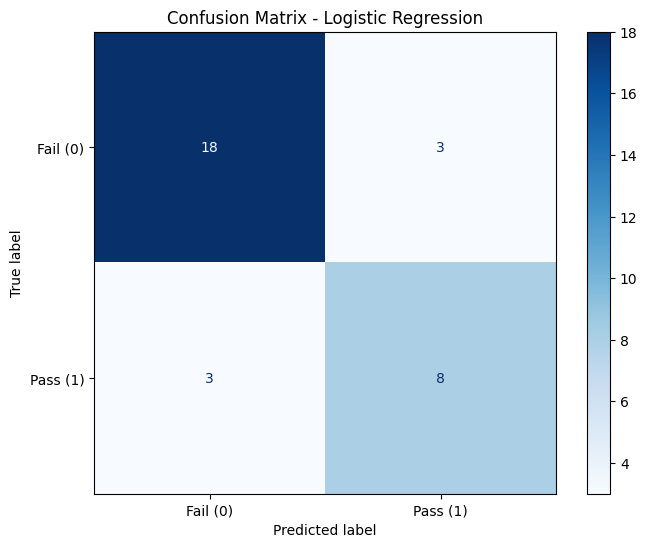

In [10]:
actual = y 
predicted = predictions['prediction_class'].values
cm = confusion_matrix(actual, predicted)

print("Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(actual, predicted))

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail (0)', 'Pass (1)'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [11]:
pd.DataFrame({"actual": actual, "predicted": predicted})

actual  predicted
0      0.0          0
1      0.0          0
2      0.0          0
3      0.0          0
4      1.0          1
5      0.0          0
6      0.0          0
7      0.0          0
8      0.0          0
9      1.0          1
10     0.0          0
11     0.0          0
12     0.0          0
13     1.0          0
14     0.0          0
15     0.0          0
16     0.0          0
17     0.0          0
18     0.0          1
19     1.0          1
20     0.0          0
21     1.0          1
22     0.0          0
23     0.0          1
24     1.0          1
25     1.0          0
26     1.0          1
27     0.0          0
28     1.0          1
29     1.0          1
30     0.0          1
31     1.0          0